<a href="https://colab.research.google.com/github/Crack-er-jack/SRISHTI/blob/main/Soumya_Group1_SRISHTI'23_Tutorial_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SRISHTI'23 - Tutorial 06**
# Linear Classifiers and Perceptron Algorithm
### Lab Coordinator: Shantanu Agrawal

In this lab, we will be studying the use of linear classifiers, followed by using perceptron learning algorithm.

**Linear classifiers** can be understood as form of **classifiers** (which will classify things into two different output categories) and we are doing this by **involving a linear equation**.

## Let's understood how line can classify datapoints using an example:<br>
Given a line as G(X), where X are values of different features given in (d+1)-dimensioanl vector form:<br>
$G(X) = w^TX = 6x_1 + 3x_2 - 12$<br>
(Here, d=2 and w = [6,3,-12], we are assuming the augmented version of w or coefficient vector)

Let's make a toy dataset.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,2,1]])

import random
for i in range(10):
  x_1 = random.randint(0,3)
  x_2 = random.randint(0,5)
  X = np.asarray([[x_1, x_2, 1]]) # adding bias term at the end for augmented version of X as well
  points = np.append(points, X, axis=0)

print(points)

[[1 2 1]
 [3 3 1]
 [0 1 1]
 [0 3 1]
 [3 4 1]
 [3 1 1]
 [3 5 1]
 [2 0 1]
 [2 2 1]
 [0 5 1]
 [2 1 1]]


In [42]:
# We have w or coefficients vector as
w = np.asarray([6,3,-12])

In [43]:
# Now let's do the linear classification
# we do it by checking the value of G(X)

def linClassification(w, points):
  for point in points:
    gx = 0
    for i in range(len(w)):
      gx+=w[i]*point[i]
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

def linClassification_VectorialForm(w, points):
  for point in points:
    gx = np.sum(w*point)
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

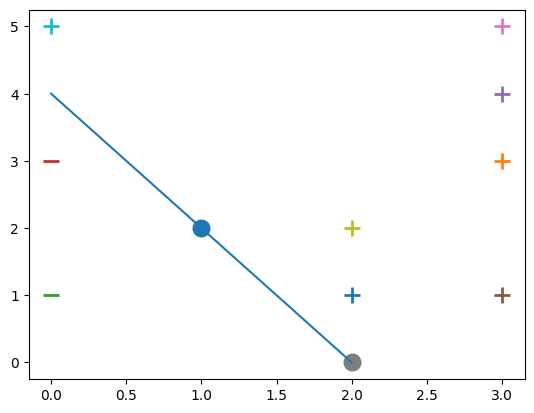

In [44]:
# Lets first plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification(w, points)
plt.show()

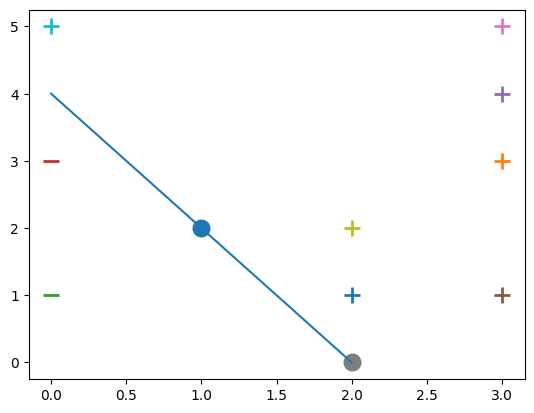

In [45]:
# Now let's check what happens if we do it vector from

# First plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification_VectorialForm(w, points)
plt.show()

So, we can see that how line can classify the data points. And we understand how it is done. But how do we get to know the correct line which would stand as our answer for the dataset.

So, to get the required line, we will try to understand various Linear Classifiers.

### First we have Perceptron Update algorithm to find the required line

We can now code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set.

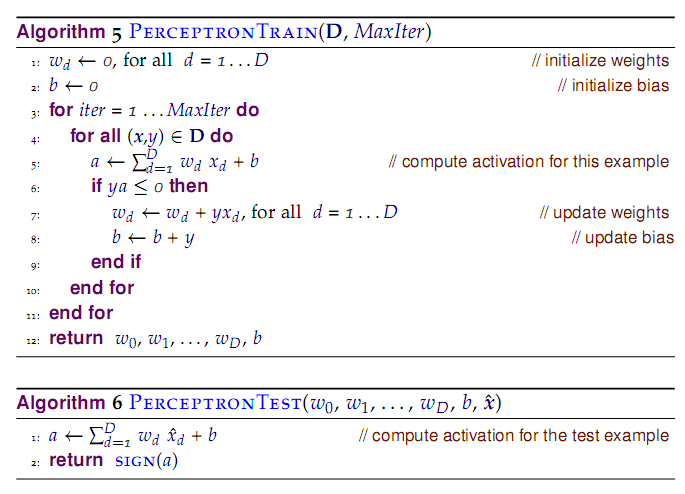

By checking **$y.a <= 0$**, misclassifed data-points have been checked and update is being done accordingly.

For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop(s) (i.e, **Batch Perceptron Update**).

The below mentioned algorithm is shown in the above image.

In [46]:
# Creating the labeled dataset for the example simulation of above shown algorithm
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, 1, 1])


In [47]:
def perceptron_algo(X, Y):
    # random line is being called to start the algorithm
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [48]:
# Let's analyse the algorithm against number of iterations needed
def perceptron_algo_plot(X, Y, eta, epochs):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(epochs):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

Next, we will see the the training error at each epoch.

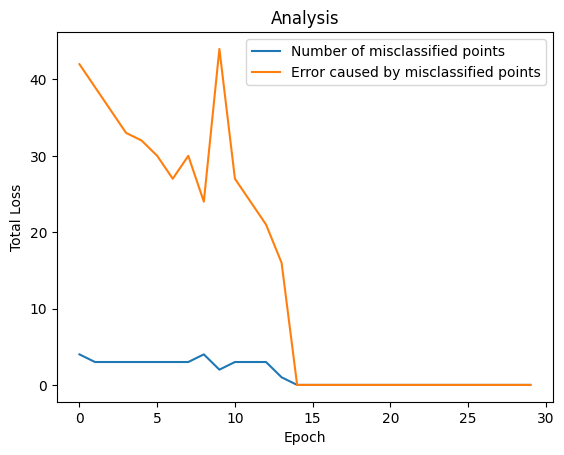

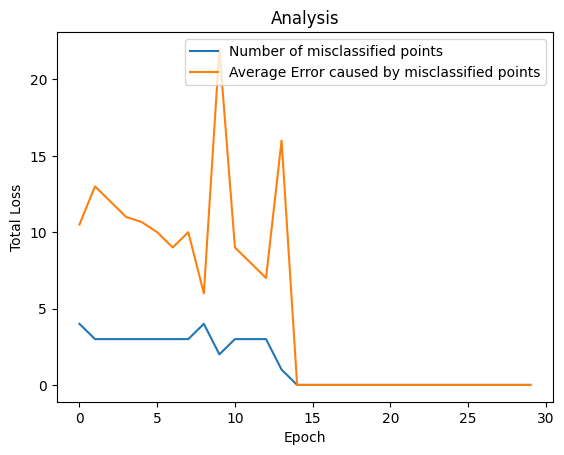

[ 2.  3. 13.]


In [50]:
w = perceptron_algo_plot(X, y, 1, 30)
print(w)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

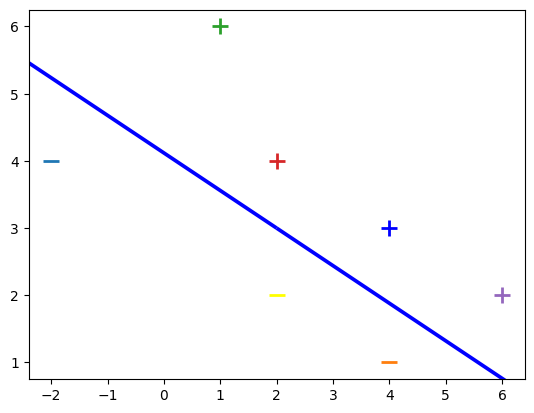

In [51]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   In our case eta or the learning rate is equal to 1. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3.   Also try to understand what is happening analytically, if you are increasing or decreasing the learning rate, how it can be helpful to you?
    - [Understanding Learning Rates and How It Improves Performance in Deep Learning](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10). Try to get the gist of the blog, would be more clearer in the later part of the course.
5.   Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
    - [Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182).
6.   Perceptron algorithm trains the model in the manner such that it **just** answers the question according to the training data but does not give the most optimal answer, in the manner that it does not maximizes the seperability from both the classes and thus have a chance of not doing well in validation or testing data. How will you try to solve this problem? Note your observation.
    - [Perceptron vs SVM: a quick comparison](https://medium.com/@subashkharel/perceptron-vs-svm-a-quick-comparison-6b5d6b5d64f). Try to read more such Medim or TowardsDataScience articles for understanding more about Machine Learning.
7.   Can this method or some extension on this be used for classifying more than two classes at once. Note your observations.

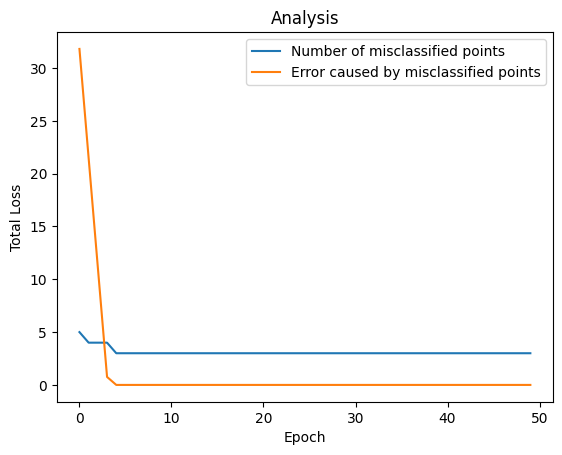

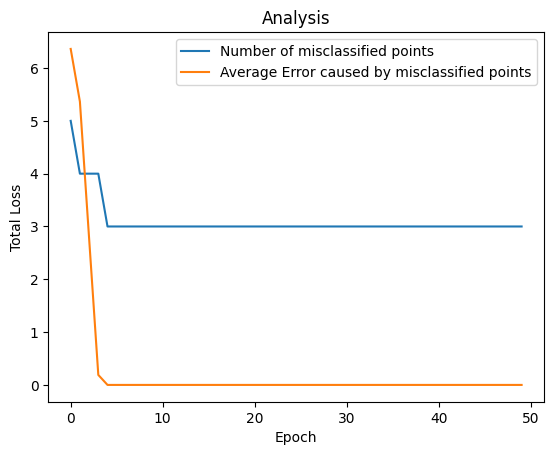

array([5.8147, 6.7224])

In [59]:
# 1 Error plot of Banknote Dataset
import pandas as pd
df = pd.read_csv('BankNote_Authentication.csv')
df = df.sample(n=5,replace=True)
X = np.array(df.iloc[:, 1:3])
Y = np.array(df['class'])

perceptron_algo_plot(X, Y, 1, 50)

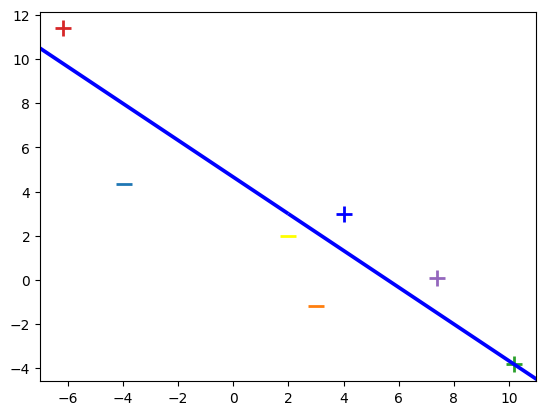

In [60]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

Almost all data points are classified are correctly. Less than 10 iterations to arrive at this point according to the plots. Below different learning rates are tested.

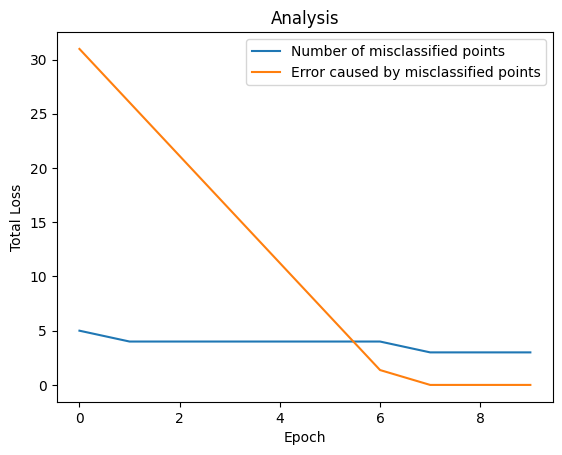

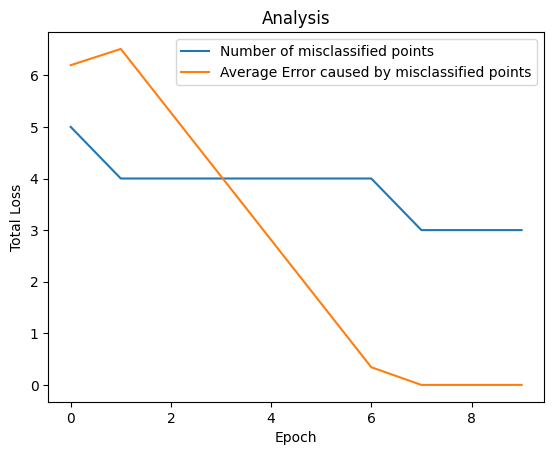

array([ 3.261   , 18.408746])

In [77]:
# 2 Increasing learning rate
import pandas as pd
df = pd.read_csv('BankNote_Authentication.csv')
df = df.sample(n=5,replace=True)
X = np.array(df.iloc[:, 1:3])
Y = np.array(df['class'])

perceptron_algo_plot(X, Y, 2, 10)

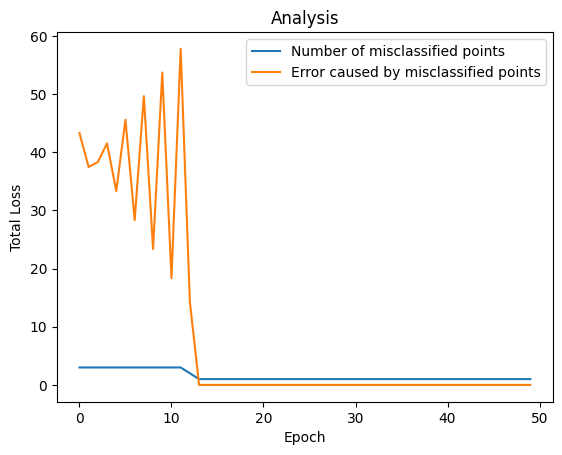

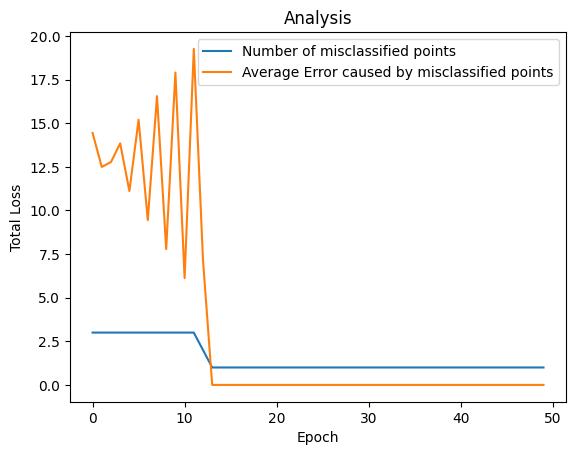

array([1.85682, 1.60278])

In [66]:
# 2 Decreasing learning rate
import pandas as pd
df = pd.read_csv('BankNote_Authentication.csv')
df = df.sample(n=5,replace=True)
X = np.array(df.iloc[:, 1:3])
Y = np.array(df['class'])

perceptron_algo_plot(X, Y, 0.3, 50)

With lesser learning rate in the above example, more than 10 iterations were required to converge. Having a very high learning rate can lead to missing the minimas and not converging at all. According to the article, I understood that learning rate is a hyper parameter and differs based on the scenario.

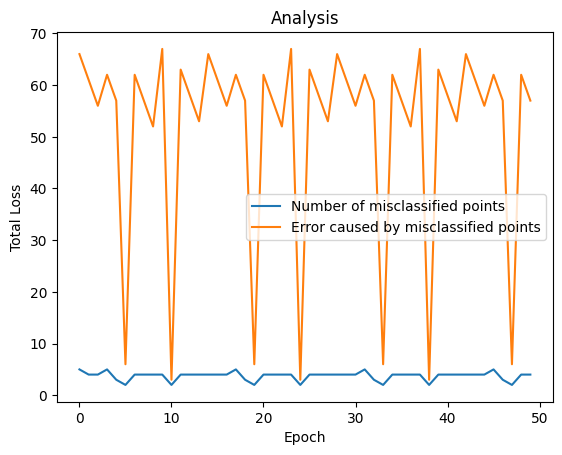

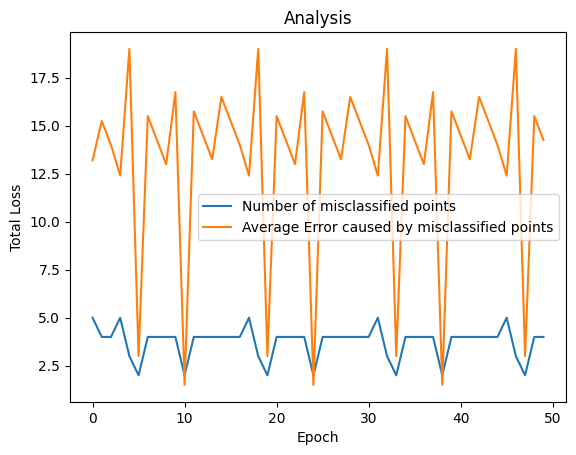

array([-4., -2.,  1.])

In [113]:
#
X = np.array([
    [-2, 4, -1],
    [2, 1, -1],
    [4, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y = np.array([-1, 1, 1, -1, -1])
perceptron_algo_plot(X, y, 1, 50)

In [97]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

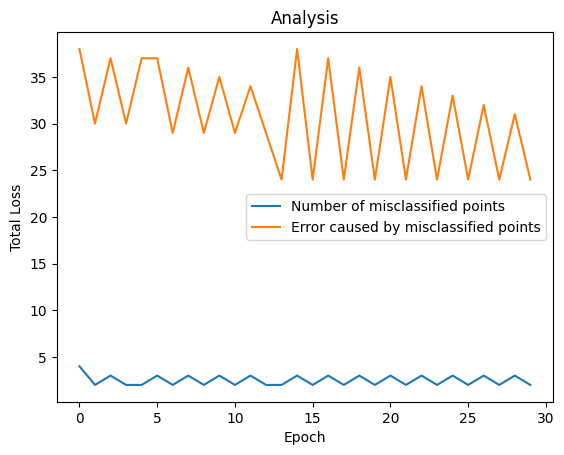

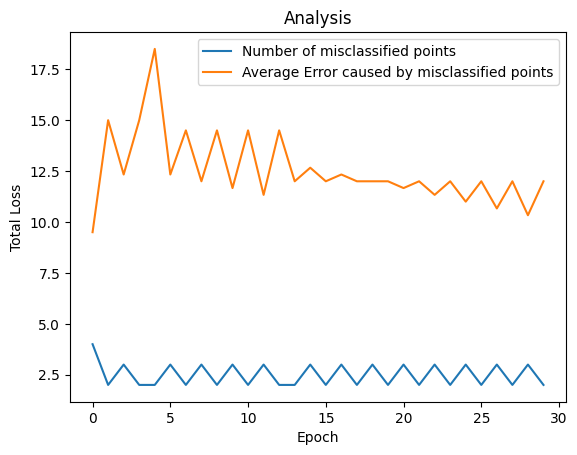

[-2.  3. 15.]


In [ ]:
print(perceptron_algo_plot(X, y))

4. If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

5. Non-Linearity can be introduced by having non linear/exponential terms. This can improve the algorith. Instead of going into infinite loop, the algorithm can fit a non linear decision boundary to the data.

6. SVM finds the most optimal hyperplane. We can extend SVM to classify more than 2 classes by finding multiple hyperplanes for pairwise data considering each of them for binary classification.